# Team Mobile Madness

---

You are on the data science department of a mobile device company. In an effort to extend account lifetime of existing customers, we need to develop targeted A/B experiments. In order to do that efficiently, we need to have a better degree of certainty about which customers are likely to to "churn" and why.

**Goals:**
- Research the concept of "churn" and A/B testing.
- Identify behaviors strongly correlated with churn in this dataset.
- Suggest what A/B tests we should develop going forward.


In [370]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

df = pd.read_csv("../dataset/churn-bigml-20.csv")

In [371]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [372]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [373]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [374]:
rename1 = {
    'Account length':    'Acct_length','Area code':'Area_code','International plan':'Int_plan','Voice mail plan':'Voice_mail_p',
    'Number vmail messages':'Num_vmail_m','Total day minutes':'Total_day_minute','Total day calls':'Total_day_calls',
    'Total day charge':'Total_day_chrg','Total eve minutes':'Total_eve_mins','Total eve calls':'Total_eve_call',
    'Total eve charge':'Total_eve_chrg','Total night minutes':'Total_night_mins','Total night calls':'Total_night_call',
    'Total night charge':'Total_night_chrg','Total intl minutes':'Total_intl_mins','Total intl calls':'Total_intl_call',
    'Total intl charge':'Total_intl_chrg','Customer service calls':'Customer_serv_calls'
    
      }
df.rename(columns=rename1, inplace=True)

In [375]:
df.head()

,State,Acct_length,Area_code,Int_plan,Voice_mail_p,Num_vmail_m,Total_day_minute,Total_day_calls,Total_day_chrg,Total_eve_mins,Total_eve_call,Total_eve_chrg,Total_night_mins,Total_night_call,Total_night_chrg,Total_intl_mins,Total_intl_call,Total_intl_chrg,Customer_serv_calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [376]:
df.columns

Index(['State', 'Acct_length', 'Area_code', 'Int_plan', 'Voice_mail_p',
       'Num_vmail_m', 'Total_day_minute', 'Total_day_calls', 'Total_day_chrg',
       'Total_eve_mins', 'Total_eve_call', 'Total_eve_chrg',
       'Total_night_mins', 'Total_night_call', 'Total_night_chrg',
       'Total_intl_mins', 'Total_intl_call', 'Total_intl_chrg',
       'Customer_serv_calls', 'Churn'],
      dtype='object')

### Converting categorical columns to 0 dn 1s

In [377]:
def checks(col1):
   
    if 'Yes' in col1:
        return 1
    
    else:
        return 0

In [378]:
df['Int_plan'] = df['Int_plan'].apply(checks)
df['Voice_mail_p'] = df['Voice_mail_p'].apply(checks)

In [379]:
df['Churn'] = df['Churn'].map(lambda x: 1 if x == True else 0)

In [380]:
df.head()

,State,Acct_length,Area_code,Int_plan,Voice_mail_p,Num_vmail_m,Total_day_minute,Total_day_calls,Total_day_chrg,Total_eve_mins,Total_eve_call,Total_eve_chrg,Total_night_mins,Total_night_call,Total_night_chrg,Total_intl_mins,Total_intl_call,Total_intl_chrg,Customer_serv_calls,Churn
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


In [381]:
df.columns

Index(['State', 'Acct_length', 'Area_code', 'Int_plan', 'Voice_mail_p',
       'Num_vmail_m', 'Total_day_minute', 'Total_day_calls', 'Total_day_chrg',
       'Total_eve_mins', 'Total_eve_call', 'Total_eve_chrg',
       'Total_night_mins', 'Total_night_call', 'Total_night_chrg',
       'Total_intl_mins', 'Total_intl_call', 'Total_intl_chrg',
       'Customer_serv_calls', 'Churn'],
      dtype='object')

In [382]:
# subsetting dataframe into the churn yes and no
# so there are less churn accounts than non-churn ones
df_1 = df[df['Churn'] == 1]
df_0 = df[df['Churn'] == 0]

In [383]:
df_1.shape

(95, 20)

In [384]:
df_0.shape

(572, 20)

In [385]:
df_1.head(2)

,State,Acct_length,Area_code,Int_plan,Voice_mail_p,Num_vmail_m,Total_day_minute,Total_day_calls,Total_day_chrg,Total_eve_mins,Total_eve_call,Total_eve_chrg,Total_night_mins,Total_night_call,Total_night_chrg,Total_intl_mins,Total_intl_call,Total_intl_chrg,Customer_serv_calls,Churn
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1


In [386]:
df_0.head(2)

,State,Acct_length,Area_code,Int_plan,Voice_mail_p,Num_vmail_m,Total_day_minute,Total_day_calls,Total_day_chrg,Total_eve_mins,Total_eve_call,Total_eve_chrg,Total_night_mins,Total_night_call,Total_night_chrg,Total_intl_mins,Total_intl_call,Total_intl_chrg,Customer_serv_calls,Churn
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0


In [387]:
df.columns

Index(['State', 'Acct_length', 'Area_code', 'Int_plan', 'Voice_mail_p',
       'Num_vmail_m', 'Total_day_minute', 'Total_day_calls', 'Total_day_chrg',
       'Total_eve_mins', 'Total_eve_call', 'Total_eve_chrg',
       'Total_night_mins', 'Total_night_call', 'Total_night_chrg',
       'Total_intl_mins', 'Total_intl_call', 'Total_intl_chrg',
       'Customer_serv_calls', 'Churn'],
      dtype='object')

In [388]:
X = df[['Customer_serv_calls', 'Total_eve_chrg', 'Total_eve_mins',
        'Total_day_chrg', 'Total_day_minute', 'Int_plan',
        'Voice_mail_p', 'Num_vmail_m']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45)

In [389]:
# Importing Classes from Packages.
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score  
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [390]:
# creating model for pipeline
model_cl = Pipeline([
    ('Standardization', StandardScaler()),
    ('RandomForestClassifier', RandomForestClassifier())
    ])

In [391]:
# Parameters for the RandomForestClassifier
param1 = {
    'RandomForestClassifier__n_estimators': [10, 20, 30],
    'RandomForestClassifier__criterion': ['gini', 'entropy'],
    'RandomForestClassifier__max_features': ['auto', 'log2', 'sqrt'],
    'RandomForestClassifier__n_jobs': [-1, 1]
        }

In [392]:
# Grid Search
grid_ = GridSearchCV(model_cl, param_grid = param1, verbose=1, n_jobs=-1)
grid_.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   10.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('Standardization', StandardScaler(copy=True, with_mean=True, with_std=True)), ('RandomForestClassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, mi...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'RandomForestClassifier__n_estimators': [10, 20, 30], 'RandomForestClassifier__criterion': ['gini', 'entropy'], 'RandomForestClassifier__max_features': ['auto', 'log2', 'sqrt'], 'RandomForestClassifier__n_jobs': [-1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [393]:
# Best Score from the Random Forest Classifier
grid_.best_score_

0.9098360655737705

In [394]:
# Best parameters from the Random Forest Classifier 
grid_.best_params_

{'RandomForestClassifier__criterion': 'entropy',
 'RandomForestClassifier__max_features': 'sqrt',
 'RandomForestClassifier__n_estimators': 30,
 'RandomForestClassifier__n_jobs': -1}

In [395]:
# Best Estimator score from the Random Forest Classifier 
grid_.best_estimator_.score(X_test, y_test)

0.91362126245847175

In [396]:
# Random Forest Regressor Predictions.
Pred = grid_.predict(X_test)

In [397]:
# Accuracy score
accuracy_score(y_test, Pred)

0.91362126245847175

In [398]:
from sklearn.metrics import confusion_matrix, classification_report
# Confusion Matrix
confuse_mat = confusion_matrix(y_test, Pred)

In [399]:
# Confusion matrix
confusion = pd.DataFrame(confuse_mat, index = ['No', 'Yes'], 
                         columns = ['No (RandForest)', 'Yes (RandForest)'])

confusion

,No (RandForest),Yes (RandForest)
No,254,4
Yes,22,21


In [400]:
# Classification report
classification = classification_report(y_test, Pred)

In [401]:
# Classification report
print(classification)

             precision    recall  f1-score   support

          0       0.92      0.98      0.95       258
          1       0.84      0.49      0.62        43

avg / total       0.91      0.91      0.90       301



In [402]:
# Probabilities of the predictions
Pred_prob = grid_.predict_proba(X_test)

# Probabilities.
Pred_prob[:2]

array([[ 1.        ,  0.        ],
       [ 0.96666667,  0.03333333]])

In [403]:
y_Pred = pd.DataFrame(y_test)

In [404]:
y_Pred['Predicted'] = Pred

In [405]:
y_Pred.columns = ['True_classification', 'Predicted']

In [408]:
y_Pred.head()

,True_classification,Predicted
654,0,0
207,0,0
72,0,0
639,0,0
642,0,0


In [406]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

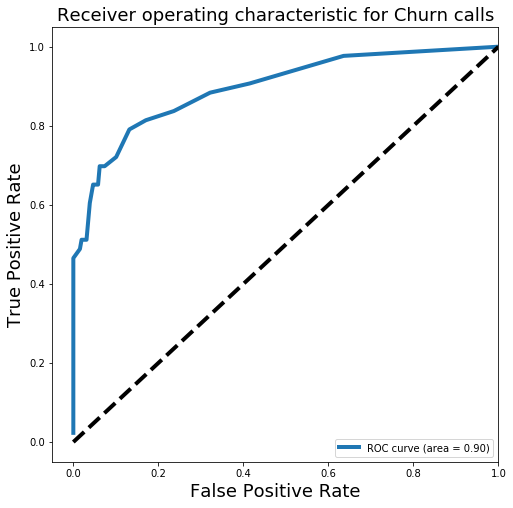

In [407]:
# ROC Curve for Random Forest Classifier 
from sklearn.metrics import roc_curve, auc #auc = area under curve

fpr, tpr, thresh = roc_curve(y_test, Pred_prob[:, 1])
roc_auc = auc(fpr, tpr)



plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for Churn calls', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [366]:
df['Churn'].value_counts()[0]/len(df['Churn'])

0.85757121439280359

In [182]:
df.head()

,State,Acct_length,Area_code,Int_plan,Voice_mail_p,Num_vmail_m,Total_day_minute,Total_day_calls,Total_day_chrg,Total_eve_mins,Total_eve_call,Total_eve_chrg,Total_night_mins,Total_night_call,Total_night_chrg,Total_intl_mins,Total_intl_call,Total_intl_chrg,Customer_serv_calls,Churn
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


In [ ]:
df_train1 = pd.DataFrame(df.groupby(['State']).agg({'NumMosquitos':'sum','WnvPresent': 'sum', 'Date': 'size'})).reset_index()

In [190]:
df.columns

Index(['State', 'Acct_length', 'Area_code', 'Int_plan', 'Voice_mail_p',
       'Num_vmail_m', 'Total_day_minute', 'Total_day_calls', 'Total_day_chrg',
       'Total_eve_mins', 'Total_eve_call', 'Total_eve_chrg',
       'Total_night_mins', 'Total_night_call', 'Total_night_chrg',
       'Total_intl_mins', 'Total_intl_call', 'Total_intl_chrg',
       'Customer_serv_calls', 'Churn'],
      dtype='object')

In [253]:
df_1 = pd.DataFrame(df.groupby(['State']).agg({'Num_vmail_m':'sum','Total_day_minute': 'sum', 
                                                  'Total_day_calls': 'sum','Total_day_chrg':'sum',
                                                 'Total_eve_mins':'sum','Total_eve_call':'sum',
                                                 'Total_eve_chrg':'sum','Total_night_mins':'sum',
                                                 'Total_night_call':'sum','Total_night_chrg':'sum',
                                                 'Total_intl_mins':'sum','Total_intl_call':'sum',
                                                 'Total_intl_chrg':'sum','Customer_serv_calls':'sum',
                                              'Churn':'sum'})).reset_index()

In [254]:
df_1.head()

,State,Num_vmail_m,Total_day_minute,Total_day_calls,Total_day_chrg,Total_eve_mins,Total_eve_call,Total_eve_chrg,Total_night_mins,Total_night_call,Total_night_chrg,Total_intl_mins,Total_intl_call,Total_intl_chrg,Customer_serv_calls,Churn
0,AK,159,1530.3,885,260.15,1646.6,913,139.96,1715.8,845,77.21,85.2,40,23.02,16,0
1,AL,129,2448.2,1365,416.19,2912.3,1404,247.55,2770.0,1208,124.65,150.6,66,40.67,15,1
2,AR,130,1475.7,712,250.87,1513.5,691,128.65,1826.1,892,82.18,78.0,31,21.06,8,0
3,AZ,199,3164.0,1842,537.89,3688.5,1917,313.53,3469.6,1878,156.13,202.7,73,54.74,40,1
4,CA,57,1902.4,1137,323.40,1984.7,949,168.72,2146.3,970,96.59,91.9,45,24.82,16,4


In [255]:
df_11 = df_1.sort_values('Churn', ascending=False)

In [256]:
df_11.head(10)

,State,Num_vmail_m,Total_day_minute,Total_day_calls,Total_day_chrg,Total_eve_mins,Total_eve_call,Total_eve_chrg,Total_night_mins,Total_night_call,Total_night_chrg,Total_intl_mins,Total_intl_call,Total_intl_chrg,Customer_serv_calls,Churn
31,NJ,143,3389.0,1839,576.15,3490.8,1965,296.73,3836.0,1791,172.61,173.8,79,46.92,29,4
13,ID,164,3270.6,1705,556.01,3306.5,1800,281.04,3288.7,1709,147.99,185.8,92,50.18,30,4
26,MT,101,2635.7,1424,448.09,3141.5,1480,267.03,2967.9,1527,133.54,155.2,75,41.91,27,4
4,CA,57,1902.4,1137,323.40,1984.7,949,168.72,2146.3,970,96.59,91.9,45,24.82,16,4
47,WA,101,3374.8,1854,573.71,3658.1,1723,310.95,3650.2,1812,164.26,179.9,77,48.60,30,4
37,OR,119,3183.9,1604,541.28,3445.0,1572,292.82,3212.3,1672,144.56,151.8,65,41.00,24,4
34,NY,27,2791.8,1410,474.60,2960.7,1440,251.65,2990.8,1544,134.60,134.1,61,36.21,27,3
22,MI,213,2798.8,1641,475.81,3085.5,1596,262.28,2823.9,1483,127.07,160.6,65,43.36,27,3
20,MD,106,1889.1,1085,321.15,2059.4,909,175.07,1817.4,967,81.77,118.7,47,32.05,20,3
19,MA,67,2514.1,1365,427.39,2708.2,1272,230.21,2265.7,1249,101.96,122.2,66,32.99,15,3


In [257]:
df_11[df_11['Churn'] == 4]

,State,Num_vmail_m,Total_day_minute,Total_day_calls,Total_day_chrg,Total_eve_mins,Total_eve_call,Total_eve_chrg,Total_night_mins,Total_night_call,Total_night_chrg,Total_intl_mins,Total_intl_call,Total_intl_chrg,Customer_serv_calls,Churn
31,NJ,143,3389.0,1839,576.15,3490.8,1965,296.73,3836.0,1791,172.61,173.8,79,46.92,29,4
13,ID,164,3270.6,1705,556.01,3306.5,1800,281.04,3288.7,1709,147.99,185.8,92,50.18,30,4
26,MT,101,2635.7,1424,448.09,3141.5,1480,267.03,2967.9,1527,133.54,155.2,75,41.91,27,4
4,CA,57,1902.4,1137,323.40,1984.7,949,168.72,2146.3,970,96.59,91.9,45,24.82,16,4
47,WA,101,3374.8,1854,573.71,3658.1,1723,310.95,3650.2,1812,164.26,179.9,77,48.60,30,4
37,OR,119,3183.9,1604,541.28,3445.0,1572,292.82,3212.3,1672,144.56,151.8,65,41.00,24,4


In [258]:
df_11[df_11['Churn'] == 3]

,State,Num_vmail_m,Total_day_minute,Total_day_calls,Total_day_chrg,Total_eve_mins,Total_eve_call,Total_eve_chrg,Total_night_mins,Total_night_call,Total_night_chrg,Total_intl_mins,Total_intl_call,Total_intl_chrg,Customer_serv_calls,Churn
34,NY,27,2791.8,1410,474.60,2960.7,1440,251.65,2990.8,1544,134.60,134.1,61,36.21,27,3
22,MI,213,2798.8,1641,475.81,3085.5,1596,262.28,2823.9,1483,127.07,160.6,65,43.36,27,3
20,MD,106,1889.1,1085,321.15,2059.4,909,175.07,1817.4,967,81.77,118.7,47,32.05,20,3
19,MA,67,2514.1,1365,427.39,2708.2,1272,230.21,2265.7,1249,101.96,122.2,66,32.99,15,3
15,IN,193,3319.1,1887,564.25,3616.3,1624,307.38,3330.4,1816,149.87,181.9,74,49.11,33,3
39,RI,118,2521.1,1686,428.59,3848.9,1696,327.15,3338.4,1638,150.24,158.5,87,42.79,24,3
25,MS,154,3239.9,1630,550.79,3545.9,1756,301.40,3397.0,1768,152.85,193.5,59,52.26,29,3
40,SC,111,2022.6,1171,343.86,2357.0,1052,200.34,2236.2,1120,100.64,112.7,50,30.44,23,3
48,WI,146,3249.9,1624,552.49,3338.5,1720,283.78,3442.8,1832,154.93,172.4,71,46.55,28,3
49,WV,134,3301.7,1805,561.30,3608.4,1650,306.68,3753.1,1797,168.88,194.9,83,52.63,16,3
